Preprocessing data and generating a subset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Path to the file on the local computer (input)
# Specify the path to the original CSV file containing the full dataset.
input_path = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data.csv"

# Path to save the processed subset
# Specify the path where the processed subset of data with 15,000 rows will be saved.
output_path_subset = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_subset_15000.csv"

# Load data from the CSV file
# Read the input data from the CSV file into a DataFrame using the pandas library.
data = pd.read_csv(input_path)

# Filter rows where 'loan_status' is not NaN
# Remove rows that do not contain values in the 'loan_status' column (e.g., missing data).
# 'loan_status' is the target variable, so rows without this information are not useful.
filtered_data = data[data['loan_status'].notnull()]

# Split input variables (X) and the target variable (y) from the filtered data
# X: contains all features (columns) except 'loan_status' – the target variable.
# y: contains the values of the target variable 'loan_status' that we want to predict.
X = filtered_data.drop(columns=["loan_status"])  # All columns except "loan_status"
y = filtered_data["loan_status"]  # Target variable

# Create a subset of 15,000 rows while maintaining class balance (stratified sampling)
# train_test_split is used here to create a subset of the data:
# - stratify=y: ensures that the class distribution in the target variable 'loan_status' remains the same as in the original dataset.
# - train_size=15000: selects exactly 15,000 rows from the input data.
# - random_state=42: using a fixed random seed ensures that the results are reproducible.
X_sub, _, y_sub, _ = train_test_split(
    X.reset_index(drop=True),  # Reset indices in the input data to be continuous.
    y.reset_index(drop=True),  # Reset indices in the target variable to match X.
    stratify=y,                # Maintain class balance in the target variable.
    train_size=15000,          # Specify the subset size as 15,000 rows.
    random_state=42            # Set a random seed for reproducibility.
)

# Combine features and the target variable into a single DataFrame
# Use the pd.concat function to merge X_sub (features) with y_sub (target variable) into one DataFrame.
# Reset the indices of both datasets before merging to ensure consistency.
subset_data = pd.concat([X_sub.reset_index(drop=True), y_sub.reset_index(drop=True)], axis=1)

# Save the processed subset to a CSV file
# Save the processed data subset (15,000 rows) to a CSV file in the specified location.
# index=False: prevents saving indices as an additional column in the CSV file.
subset_data.to_csv(output_path_subset, index=False)

# Inform the user that the data subset has been successfully saved.
print(f"Data subset saved to: {output_path_subset}")


Data subset saved to: C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_subset_15000.csv


Loading and Analyzing a Processed Data Subset

In [4]:
# Loading data from the previous step
# Specify the path to the CSV file containing the processed data subset (15,000 rows).
input_path_subset = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_subset_15000.csv"

# Load the data from the CSV file into a DataFrame using pandas.
subset_data = pd.read_csv(input_path_subset)

# Display basic information about the data
# The .info() function displays key details about the DataFrame, including:
# - Number of rows and columns.
# - Column names and data types.
# - Number of non-null values in each column.
subset_info = subset_data.info()

# Display descriptive statistics for numerical data
# The .describe() function generates descriptive statistics for numerical columns in the DataFrame, such as:
# - count: number of non-null values.
# - mean: average value.
# - std: standard deviation.
# - min, max: minimum and maximum values.
# - percentiles (25%, 50%, 75%): quartiles of the data.
subset_description = subset_data.describe()

# Check for missing values in the dataset
# The .isnull().sum() function counts the number of missing values (NaN) in each column.
# This helps identify columns with incomplete data that may require further processing.
missing_values = subset_data.isnull().sum()

# Save statistics to a CSV file (e.g., for reporting)
# The descriptive statistics (.describe()) are saved to a new CSV file in the specified location.
# This can be useful for data analysis in a spreadsheet or reporting.
stats_output_path = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_stats.csv"
subset_description.to_csv(stats_output_path)

# Inform the user that the statistics have been successfully saved to a CSV file.
print(f"Data statistics saved to: {stats_output_path}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      15000 non-null  float64
 1   person_gender                   15000 non-null  object 
 2   person_education                15000 non-null  object 
 3   person_income                   15000 non-null  float64
 4   person_emp_exp                  15000 non-null  int64  
 5   person_home_ownership           15000 non-null  object 
 6   loan_amnt                       15000 non-null  float64
 7   loan_intent                     15000 non-null  object 
 8   loan_int_rate                   15000 non-null  float64
 9   loan_percent_income             15000 non-null  float64
 10  cb_person_cred_hist_length      15000 non-null  float64
 11  credit_score                    15000 non-null  int64  
 12  previous_loan_defaults_on_file  

Exploratory Analysis of Numerical Variables and Outlier Identification

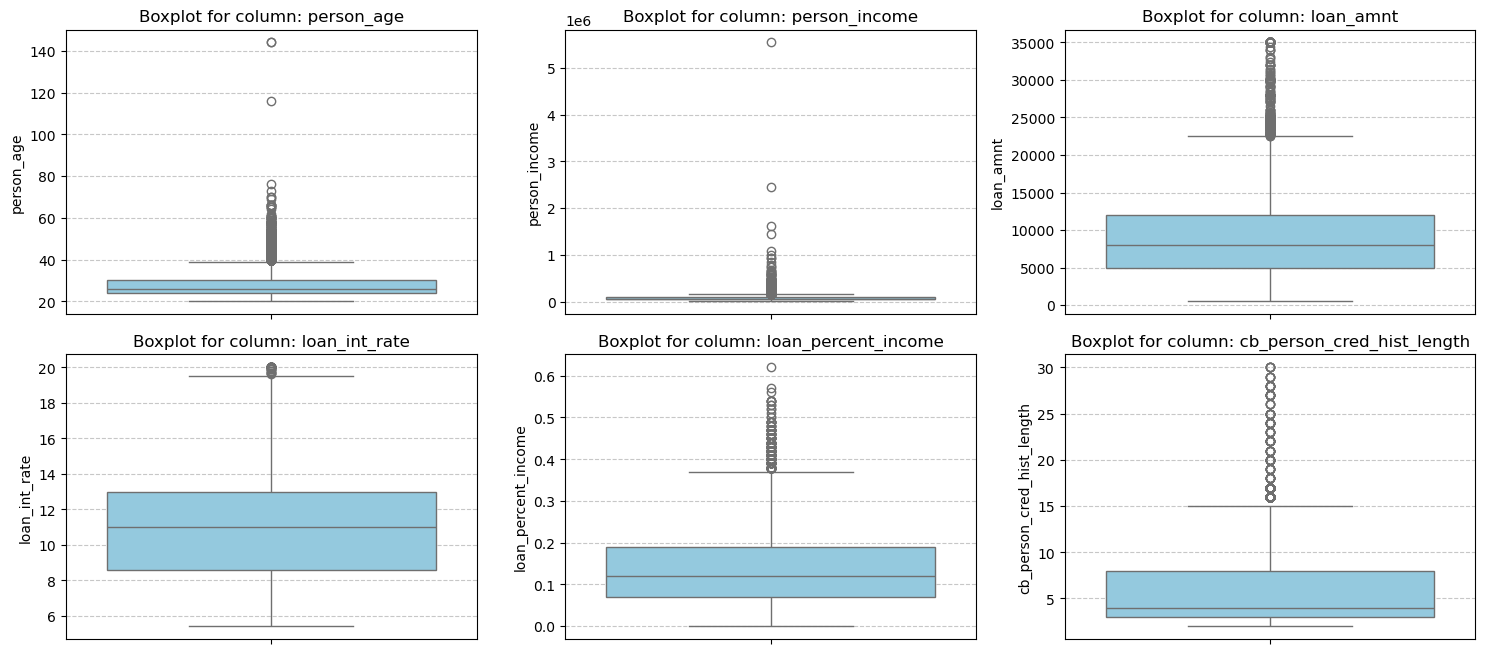

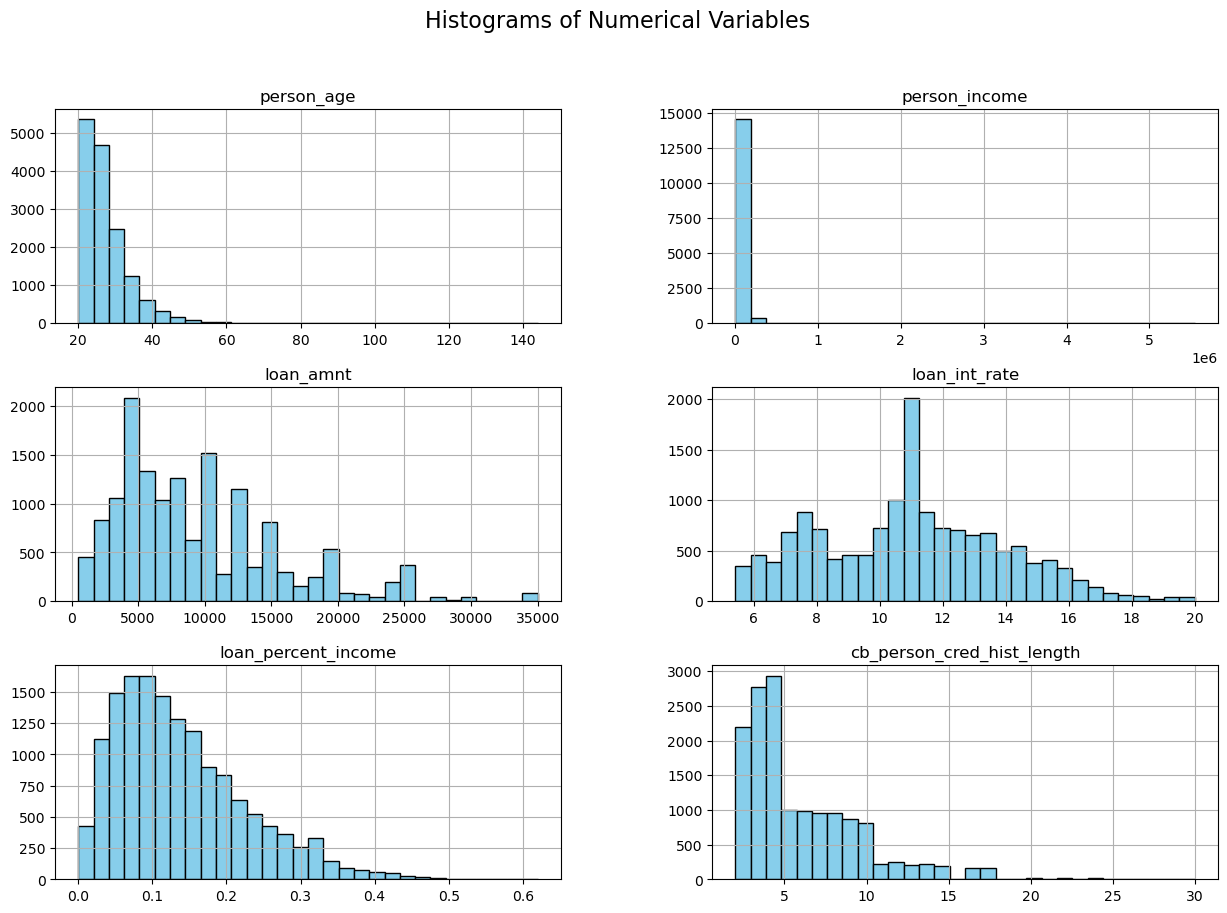

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data from the previous step
# Specify the path to the CSV file containing the processed data subset (15,000 rows) from the earlier step.
input_path_stats = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_subset_15000.csv"
# Load the data from the CSV file into a DataFrame using pandas.
subset_data = pd.read_csv(input_path_stats)

# Define numerical columns for outlier analysis
# Extract all numerical columns in the DataFrame based on their data type ('float64').
# The variable numeric_columns stores a list of numerical column names to be analyzed.
numeric_columns = subset_data.select_dtypes(include=['float64']).columns

# Visualizing values in each numerical column using boxplots
# Create a multi-panel boxplot for each numerical column to identify outliers.
plt.figure(figsize=(15, 10))  # Set the figure size to 15 x 10 inches.
for i, column in enumerate(numeric_columns, 1):  # Iterate through each numerical column (starting from 1).
    plt.subplot(3, 3, i)  # Create a 3x3 grid layout, assigning each numerical column to a subplot.
    sns.boxplot(y=subset_data[column], color='skyblue')  # Draw a boxplot for the column (color: skyblue).
    plt.title(f"Boxplot for column: {column}")  # Set the plot title indicating the column name.
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability.
plt.tight_layout()  # Automatically adjust the layout to prevent overlapping elements.
plt.show()  # Display the boxplots for all columns.

# Visualizing histograms for each numerical variable
# Create histograms for each numerical column to analyze the distribution of data in individual columns.
subset_data[numeric_columns].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
# Set a title for the entire figure containing histograms.
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()  # Display all histograms simultaneously.


Detecting and Removing Outliers from Numerical Data

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data from the previous step
# Load data from a CSV file containing the processed data subset (15,000 rows) from the previous stage.
input_path_stats = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_subset_15000.csv"
subset_data = pd.read_csv(input_path_stats)

# Defining numerical columns for outlier analysis
# A list of numerical columns that will be analyzed for outliers.
outlier_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_percent_income']

# Function to calculate outlier bounds using the IQR method and return these values
# The function calculates the lower and upper bound for a given column using the Interquartile Range (IQR) method.
def calculate_outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                   # Interquartile range (IQR)
    lower_bound = Q1 - 1.5 * IQR    # Lower bound (Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR    # Upper bound (Q3 + 1.5 * IQR)
    return lower_bound, upper_bound

# Display the number of rows before removing outliers
# Show the number of rows in the dataset before removing outlier values.
print(f"Number of rows before removing outliers: {subset_data.shape[0]}")

# Compute and display outlier bounds
# Iterate through each column in the outlier_columns list and calculate the outlier bounds.
for column in outlier_columns:
    lower_bound, upper_bound = calculate_outlier_bounds(subset_data, column)
    print(f"{column}: Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    
    # Remove rows where the column values fall outside the calculated bounds.
    subset_data = subset_data[(subset_data[column] >= lower_bound) & (subset_data[column] <= upper_bound)]

# Display the number of rows after removing outliers
# Inform how many rows remain in the dataset after removing outlier values.
print(f"Number of rows after removing outliers: {subset_data.shape[0]}")

# Display summary statistics after outlier removal
# Show descriptive statistics (e.g., mean, quartiles, min, max) for the dataset after outlier removal.
print("\nSummary of data after removing outliers:")
print(subset_data.describe())

# Save the data after outlier removal
# Save the processed data (after outlier removal) to a new CSV file.
output_path_outliers = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_no_outliers.csv"
subset_data.to_csv(output_path_outliers, index=False)

# Inform the user that the cleaned data has been successfully saved.
print(f"\nData after outlier removal has been saved to: {output_path_outliers}")


Number of rows before removing outliers: 15000
person_age: Lower bound = 15.0, Upper bound = 39.0
person_income: Lower bound = -24990.25, Upper bound = 166547.75
person_emp_exp: Lower bound = -8.0, Upper bound = 16.0
loan_percent_income: Lower bound = -0.085, Upper bound = 0.355
Number of rows after removing outliers: 13102

Summary of data after removing outliers:
         person_age  person_income  person_emp_exp     loan_amnt  \
count  13102.000000   13102.000000    13102.000000  13102.000000   
mean      26.573882   71064.413372        4.229583   9011.907190   
std        4.077956   32246.975279        4.056744   5828.470901   
min       20.000000    8000.000000        0.000000    500.000000   
25%       23.000000   46625.000000        1.000000   5000.000000   
50%       26.000000   65800.500000        3.000000   7800.000000   
75%       29.000000   90782.000000        7.000000  12000.000000   
max       39.000000  166545.000000       16.000000  35000.000000   

       loan_int_rat

Przygotowanie danych

Checking for Negative Values in Numerical Columns and Saving Verified Data

In [13]:
# Loading data after outlier removal
# Load data from a CSV file containing the dataset after removing outlier values.
input_path_outliers = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_no_outliers.csv"
filtered_data = pd.read_csv(input_path_outliers)

# Checking data after outlier removal (negative values in numerical columns)
# Extract a list of numerical columns (types: float64, int64) to check for negative values.
numeric_columns_after_outliers = filtered_data.select_dtypes(include=['float64', 'int64']).columns

# Searching for negative values in each numerical column
# Create a dictionary that stores the count of negative values for each numerical column.
# For each column, filter rows where values are less than 0 and count such rows.
negative_values = {col: filtered_data[filtered_data[col] < 0][col].count() for col in numeric_columns_after_outliers}

# Display a message based on the result
# Check if any column contains negative values:
# - If yes, print details (column name and count of negative values).
# - If no, inform that the data is valid.
print("\nChecking columns for negative values:")
if any(count > 0 for count in negative_values.values()):  # If any column has negative values
    print("Columns with negative values:")
    for col, count in negative_values.items():  # Iterate through columns and negative value counts
        if count > 0:
            print(f"- {col}: {count} negative values")  # Display details for columns with negative values
else:
    print("No columns with negative values. The data is valid!")  # Message when no negative values are found

# Saving the verified data to a CSV file
# After verification that the data contains no negative values, save it to a new CSV file.
output_path_verified = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_verified.csv"
filtered_data.to_csv(output_path_verified, index=False)  # index=False prevents DataFrame indices from being saved.

# Inform the user that the verified data has been saved to a new file.
print(f"\nVerified data has been saved to: {output_path_verified}")



Checking columns for negative values:
No columns with negative values. The data is valid!

Verified data has been saved to: C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_verified.csv


Kodowanie zmiennych kategorycznych, normalizacja i podział danych

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Loading the verified data after removing negative values
# Load the verified dataset from a CSV file (after previous preprocessing steps).
input_path_verified = r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\loan_data_verified.csv"
data = pd.read_csv(input_path_verified)

# 1. Encoding categorical variables
# Selecting categorical variables
# Extract columns with 'object' data type as categorical variables to be encoded.
categorical_columns = data.select_dtypes(include=['object']).columns

# Encoding using OneHotEncoder
# Apply OneHotEncoder, which transforms categorical values into binary (0 or 1).
# - drop='first': Eliminates the first level in each column to avoid the dummy variable trap.
# - sparse_output=False: Ensures the output is a dense matrix (DataFrame-friendly).
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = pd.DataFrame(
    encoder.fit_transform(data[categorical_columns]),  # Encoding categorical values
    columns=encoder.get_feature_names_out(categorical_columns)  # Column names after encoding
)

# Merging encoded columns with the original dataset (excluding categorical ones)
# Remove the original categorical columns and replace them with the encoded columns.
data = pd.concat([data.drop(columns=categorical_columns), encoded_categorical], axis=1)

# 2. Normalizing numerical variables
# Selecting numerical variables
# Extract all columns with data types 'float64' and 'int64' that will be normalized.
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalization using StandardScaler
# StandardScaler transforms data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# 3. Splitting into training, validation, and test sets
# Separating the target variable (y) and features (X)
# X: Contains all columns except 'loan_status' (features).
# y: The target variable 'loan_status' that we aim to predict.
X = data.drop(columns=["loan_status"])
y = data["loan_status"]

# Splitting into training (70%), validation (15%), and test (15%) sets
# train_test_split:
# - test_size=0.3: Allocate 30% of data for validation and testing.
# - stratify=y: Maintain class balance in the target variable 'y'.
# Second split: Divide the temporary set (30%) into validation and test sets equally (50/50).
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42
)

# Saving the datasets to CSV files
# Each dataset (X_train, y_train, X_val, y_val, X_test, y_test) is saved as a separate CSV file.
X_train.to_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\X_train.csv", index=False)
y_train.to_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\y_train.csv", index=False)
X_val.to_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\X_val.csv", index=False)
y_val.to_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\y_val.csv", index=False)
X_test.to_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\X_test.csv", index=False)
y_test.to_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\y_test.csv", index=False)

# Display dataset sizes
# Print the number of rows in each dataset (training, validation, test).
print(f"Number of rows in the training set: {X_train.shape[0]}")
print(f"Number of rows in the validation set: {X_val.shape[0]}")
print(f"Number of rows in the test set: {X_test.shape[0]}")

# Final message
# Inform the user that all datasets have been saved as CSV files.
print("\nAll datasets have been successfully saved to corresponding CSV files.")


Number of rows in the training set: 9171
Number of rows in the validation set: 1965
Number of rows in the test set: 1966

All datasets have been successfully saved to corresponding CSV files.


Hyperparameter Tuning and Model Evaluation

In [18]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Loading training and validation datasets (validation set as test set)
# Load data from training (X_train, y_train) and validation (X_test, y_test) sets, 
# which will be used for training and testing the models.
X_train = pd.read_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\X_train.csv")
y_train = pd.read_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\y_train.csv")
X_test = pd.read_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\X_val.csv")
y_test = pd.read_csv(r"C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki nr 2\y_val.csv")

# Convert y_train and y_test to vectors if they are DataFrames
# Sometimes target labels (y_train, y_test) are loaded as DataFrames.
# Ensure they are converted into Series (one-dimensional vectors).
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]  # Extract the first column
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]  # Extract the first column

# Encoding the target variable (e.g., into binary values)
# Check if y_train and y_test are categorical (e.g., textual labels). If so:
# - Map categorical values to binary (1 for 'approved', 0 for 'rejected').
# If values are already numerical, convert them into binary using a 0.5 threshold.
if y_train.dtype == 'object':  # If data is textual (e.g., "approved", "rejected")
    y_train = y_train.map({'approved': 1, 'rejected': 0})  # Convert to 1 and 0
    y_test = y_test.map({'approved': 1, 'rejected': 0})
elif y_train.dtype in ['float64', 'int64']:  # If data is numerical
    y_train = (y_train > 0.5).astype(int)  # Convert values > 0.5 to 1, others to 0
    y_test = (y_test > 0.5).astype(int)

# List of models and their hyperparameter grids
# Define a list of models to test. For each model, specify:
# - model name ('name'),
# - model object ('model'),
# - hyperparameter grid to test ('params').
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],  # Regularization strength
            'penalty': ['l1', 'l2'],  # Regularization type: L1 (lasso) or L2 (ridge)
            'solver': ['liblinear']  # Optimization algorithm supporting L1 and L2
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],  # Number of trees in the forest
            'max_depth': [5, 10, None],  # Maximum depth of the decision tree
            'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
            'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
        }
    },
    {
        'name': 'Support Vector Machine (SVM)',
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],  # Regularization parameter
            'kernel': ['linear', 'rbf'],  # Kernel type: linear or RBF (radial basis function)
            'gamma': ['scale', 'auto']  # Kernel function scaling
        }
    },
    {
        'name': 'Gradient Boosting (XGBoost)',
        'model': XGBClassifier(eval_metric='logloss'),  # Evaluation metric: logloss
        'params': {
            'n_estimators': [50, 100, 200],  # Number of boosting iterations
            'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
            'max_depth': [3, 5, 7]  # Maximum tree depth
        }
    },
    {
        'name': 'LightGBM',
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],  # Number of boosting iterations
            'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
            'num_leaves': [31, 50, 100]  # Number of leaves in a tree
        }
    },
    {
        'name': 'Neural Network (MLPClassifier)',
        'model': MLPClassifier(max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Hidden layer architecture
            'activation': ['tanh', 'relu'],  # Activation functions: hyperbolic tangent or ReLU
            'alpha': [0.0001, 0.001],  # L2 regularization strength
            'learning_rate': ['constant', 'adaptive']  # Learning strategy
        }
    }
]

# Results storage
# List to store results for each model
results = []

# Iterate through models
# Perform Grid Search with cross-validation for each model in `models`.
for model_config in models:
    print(f"\nModel: {model_config['name']}")  # Display model name
    grid = GridSearchCV(
        estimator=model_config['model'],  # Model for optimization
        param_grid=model_config['params'],  # Hyperparameter grid
        cv=5,  # Number of cross-validation folds
        scoring='roc_auc',  # Evaluation metric (ROC-AUC)
        verbose=1,  # Display details during grid search
        n_jobs=-1  # Use all available CPU cores
    )
    grid.fit(X_train, y_train)  # Train model on training data

    # Best model and parameters
    best_model = grid.best_estimator_  # Best model with optimal parameters
    best_params = grid.best_params_  # Best hyperparameters
    best_score = grid.best_score_  # Best ROC-AUC score in validation

    print(f"Best parameters: {best_params}")
    print(f"Best ROC-AUC score (cross-validation): {best_score:.4f}")

    # Testing on the test set
    test_predictions = best_model.predict(X_test)  # Make predictions on the test data
    test_report = classification_report(y_test, test_predictions, output_dict=True)  # Classification report

    # Store results
    results.append({
        'Model': model_config['name'],
        'Best Params': best_params,
        'Validation ROC-AUC': best_score,
        'Test Accuracy': test_report['accuracy'],
        'Test F1-Score': test_report['weighted avg']['f1-score']
    })

    print(f"\nClassification report for {model_config['name']} (test set):")
    print(classification_report(y_test, test_predictions))

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nSummary of results:")
print(results_df)

# Save results to a CSV file
results_df.to_csv("model_hyperparameter_results.csv", index=False)
print("\nResults saved to model_hyperparameter_results.csv")



Model: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC-AUC score (cross-validation): 0.9495

Classification report for Logistic Regression (test set):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1540
           1       0.78      0.77      0.78       425

    accuracy                           0.90      1965
   macro avg       0.86      0.86      0.86      1965
weighted avg       0.90      0.90      0.90      1965


Model: Random Forest
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC score (cross-validation): 0.9668

Classification report for Random Forest (test set):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1540
           1   

C:\Users\slawo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Analysis of Results

In [20]:
# Loading the results from the previous step
# Convert the `results` list into a DataFrame to facilitate sorting and analysis.
results_df = pd.DataFrame(results)

# Display results in descending order based on Validation ROC-AUC
# Sort the DataFrame by the "Validation ROC-AUC" column in descending order.
print("Results sorted by Validation ROC-AUC:")
sorted_by_auc = results_df.sort_values(by="Validation ROC-AUC", ascending=False)
print(sorted_by_auc)

# Display results in descending order based on Test F1-Score
# Sort the DataFrame by the "Test F1-Score" column in descending order.
print("\nResults sorted by Test F1-Score:")
sorted_by_f1 = results_df.sort_values(by="Test F1-Score", ascending=False)
print(sorted_by_f1)

# Best model based on Validation ROC-AUC
# Retrieve the first row of the sorted DataFrame (highest Validation ROC-AUC score).
best_model_auc = sorted_by_auc.iloc[0]  # Best model by Validation ROC-AUC
print(f"\nModel with the highest Validation ROC-AUC: {best_model_auc['Model']}")
print(f"Validation ROC-AUC: {best_model_auc['Validation ROC-AUC']}")
print(f"Test Accuracy: {best_model_auc['Test Accuracy']}")
print(f"Test F1-Score: {best_model_auc['Test F1-Score']}")

# Best model based on Test F1-Score
# Retrieve the first row of the sorted DataFrame (highest Test F1-Score).
best_model_f1 = sorted_by_f1.iloc[0]  # Best model by Test F1-Score
print(f"\nModel with the highest Test F1-Score: {best_model_f1['Model']}")
print(f"Validation ROC-AUC: {best_model_f1['Validation ROC-AUC']}")
print(f"Test Accuracy: {best_model_f1['Test Accuracy']}")
print(f"Test F1-Score: {best_model_f1['Test F1-Score']}")


Results sorted by Validation ROC-AUC:
                            Model  \
3     Gradient Boosting (XGBoost)   
4                        LightGBM   
1                   Random Forest   
5  Neural Network (MLPClassifier)   
2    Support Vector Machine (SVM)   
0             Logistic Regression   

                                         Best Params  Validation ROC-AUC  \
3  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...            0.970462   
4  {'learning_rate': 0.1, 'n_estimators': 200, 'n...            0.969808   
1  {'max_depth': None, 'min_samples_leaf': 1, 'mi...            0.966787   
5  {'activation': 'relu', 'alpha': 0.0001, 'hidde...            0.955039   
2        {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}            0.952130   
0  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...            0.949535   

   Test Accuracy  Test F1-Score  
3       0.922137       0.921199  
4       0.921628       0.920424  
1       0.916539       0.914598  
5       0.899746       0.899788  

Visualization of Results

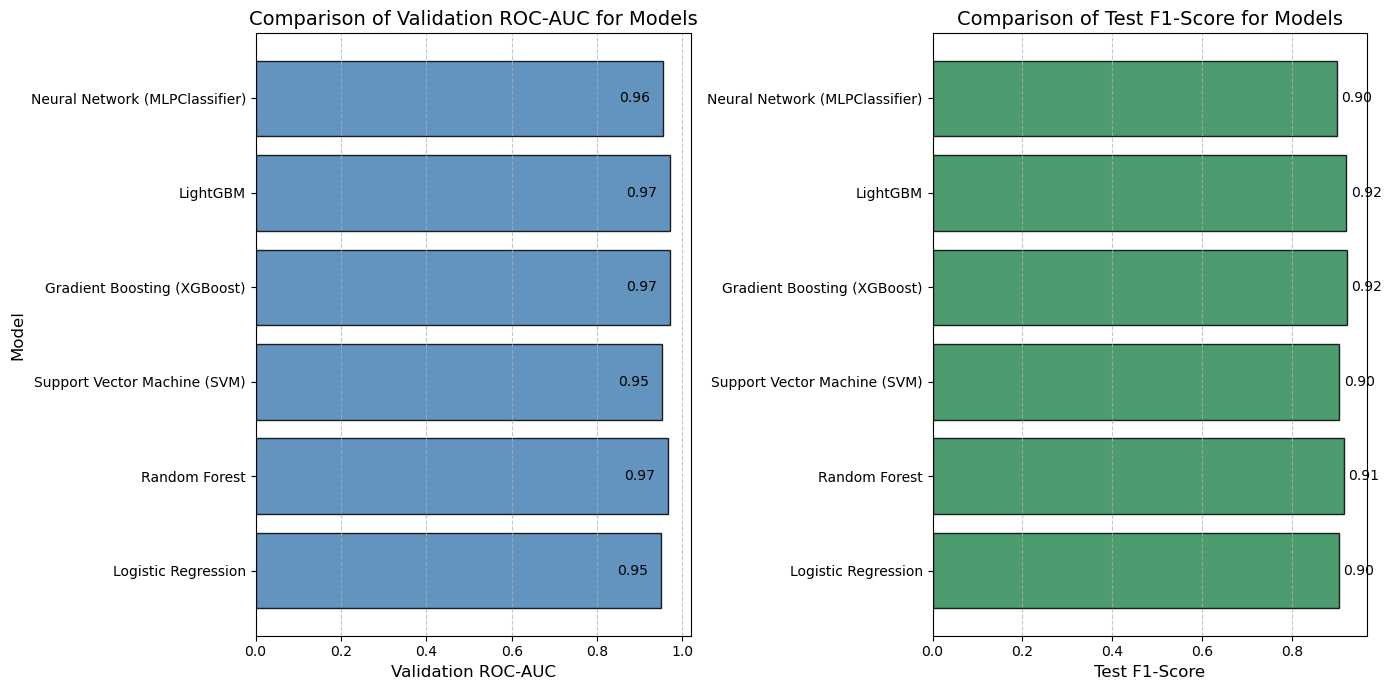

In [21]:
import matplotlib.pyplot as plt

# Plot settings
# Create a figure with two side-by-side panels (1 row, 2 columns).
plt.figure(figsize=(14, 7))  # Set the overall figure size to 14x7 inches.

# Visualization of Validation ROC-AUC
plt.subplot(1, 2, 1)  # Create the first panel (on the left side).
bars = plt.barh(  # Create a horizontal bar chart for Validation ROC-AUC.
    results_df['Model'],  # Model names on the Y-axis.
    results_df['Validation ROC-AUC'],  # ROC-AUC values on the X-axis.
    color='steelblue',  # Bar color.
    edgecolor='black',  # Bar border color.
    alpha=0.85  # Transparency of bars (0 = fully transparent, 1 = solid).
)
plt.xlabel("Validation ROC-AUC", fontsize=12)  # Label for the X-axis.
plt.ylabel("Model", fontsize=12)  # Label for the Y-axis.
plt.title("Comparison of Validation ROC-AUC for Models", fontsize=14)  # Chart title.
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Vertical grid with dashed lines.

# Adding value labels to the ROC-AUC bars
for bar in bars:  # Iterate through each bar in the chart.
    width = bar.get_width()  # Get the bar width (ROC-AUC value).
    # Determine text position:
    # - If value > 0.94, place it inside the bar (left side).
    # - Otherwise, place it outside the bar (right side).
    position = width - 0.03 if width > 0.94 else width + 0.01
    align = 'right' if width > 0.94 else 'left'
    # Add text to the chart with two decimal places.
    plt.text(
        position,  # X position of the text.
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar).
        f"{width:.2f}",  # Display text (e.g., "0.92").
        va='center',  # Vertical alignment (center of the bar).
        ha=align,  # Horizontal alignment (right or left side).
        fontsize=10  # Font size.
    )

# Visualization of Test F1-Score
plt.subplot(1, 2, 2)  # Create the second panel (on the right side).
bars = plt.barh(  # Create a horizontal bar chart for Test F1-Score.
    results_df['Model'],  # Model names on the Y-axis.
    results_df['Test F1-Score'],  # F1-Score values on the X-axis.
    color='seagreen',  # Bar color.
    edgecolor='black',  # Bar border color.
    alpha=0.85  # Transparency of bars.
)
plt.xlabel("Test F1-Score", fontsize=12)  # Label for the X-axis.
plt.title("Comparison of Test F1-Score for Models", fontsize=14)  # Chart title.
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Vertical grid with dashed lines.

# Adding value labels to the F1-Score bars
for bar in bars:  # Iterate through each bar in the chart.
    width = bar.get_width()  # Get the bar width (F1-Score value).
    # Determine text position:
    # - If value > 0.94, place it inside the bar (left side).
    # - Otherwise, place it outside the bar (right side).
    position = width - 0.03 if width > 0.94 else width + 0.01
    align = 'right' if width > 0.94 else 'left'
    # Add text to the chart with two decimal places.
    plt.text(
        position,  # X position of the text.
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar).
        f"{width:.2f}",  # Display text (e.g., "0.88").
        va='center',  # Vertical alignment (center of the bar).
        ha=align,  # Horizontal alignment (right or left side).
        fontsize=10  # Font size.
    )

# Adjust layout of the plots
plt.tight_layout()  # Automatically adjust elements to prevent overlapping.
plt.show()  # Display the chart.
